Using all preprocessed data, I build here a NN that aims to predict the 0s and 1s targets. It increases the logistic regression prediction score reaching above 87%

In [41]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import os 
path = ('/Users/gabriel/Documents/data')
os.chdir(path)

In [44]:
df = pd.read_csv('Last_preprocessing.csv')
df.head()

,A0_East Anglia,A0_East Midlands,A0_Greater London,A0_Non-Mainland UK,A0_North-East England,A0_North-West England,A0_Others,A0_Scotland,A0_South-East England,A0_South-West England,...,V10,V2,V3,V4,V5,V6,V7,V9,TP,Targets
0,0,0,0,0,0,0,0,0,0,0,...,-0.056761,0.269289,0.178104,-0.382676,0.155328,-0.032119,-0.558132,-0.308204,-0.593742,0
1,0,0,0,0,0,0,0,0,0,0,...,-0.056761,0.269289,-0.188684,-0.718096,1.751069,-0.032119,-0.074237,-0.731282,0.938918,1
2,0,0,0,0,0,0,0,0,1,0,...,-0.056761,-1.996511,0.104747,-0.889739,-0.482968,-0.032119,-0.074237,-0.901180,1.398619,1
3,0,0,0,0,0,0,0,0,0,0,...,-0.056761,0.269289,-0.115327,-0.331899,0.155328,-0.032119,-0.074237,-0.109436,1.081091,1
4,1,0,0,0,0,0,0,0,0,0,...,-0.056761,0.269289,-0.408757,-0.175274,-1.440413,-0.032119,0.167710,-0.140528,-0.658814,0


In [45]:
df.shape

(647206, 64)

In [46]:
inputs = df.iloc[:,:-1]
inputs.head()

,A0_East Anglia,A0_East Midlands,A0_Greater London,A0_Non-Mainland UK,A0_North-East England,A0_North-West England,A0_Others,A0_Scotland,A0_South-East England,A0_South-West England,...,V1,V10,V2,V3,V4,V5,V6,V7,V9,TP
0,0,0,0,0,0,0,0,0,0,0,...,2.091244,-0.056761,0.269289,0.178104,-0.382676,0.155328,-0.032119,-0.558132,-0.308204,-0.593742
1,0,0,0,0,0,0,0,0,0,0,...,-0.941047,-0.056761,0.269289,-0.188684,-0.718096,1.751069,-0.032119,-0.074237,-0.731282,0.938918
2,0,0,0,0,0,0,0,0,1,0,...,-0.363468,-0.056761,-1.996511,0.104747,-0.889739,-0.482968,-0.032119,-0.074237,-0.901180,1.398619
3,0,0,0,0,0,0,0,0,0,0,...,0.575098,-0.056761,0.269289,-0.115327,-0.331899,0.155328,-0.032119,-0.074237,-0.109436,1.081091
4,1,0,0,0,0,0,0,0,0,0,...,-1.085442,-0.056761,0.269289,-0.408757,-0.175274,-1.440413,-0.032119,0.167710,-0.140528,-0.658814


In [47]:
targets = df['Targets']
targets.nunique()

2

## Spliting data into train and test to perform cross-validation. 

In [48]:
x_train,x_test,y_train,y_test = train_test_split(inputs,targets,train_size = 0.8, random_state = 20)

In [49]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#80% of data is used for training and %20 for cross-validation

(517764, 63) (517764,)
(129442, 63) (129442,)


In [50]:
x_train.shape[1]

63

# NN

In [70]:
input_size = x_train.shape[1]
output_size = 2 # 0 or 1
hidden_layer = 200
max_epoch = 6

model = tf.keras.Sequential([
    
    tf.keras.layers.Input(shape = (input_size,)),
    tf.keras.layers.Dense(hidden_layer, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer, activation = 'relu'),
    tf.keras.layers.Dense(output_size, activation = 'softmax'),
    
])


In [71]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [72]:
r = model.fit(x_train,
         y_train,
         epochs = max_epoch,
         validation_data = (x_test,y_test),
         verbose = 2)

Epoch 1/6
16181/16181 - 17s - loss: 0.3016 - accuracy: 0.8626 - val_loss: 0.2894 - val_accuracy: 0.8679
Epoch 2/6
16181/16181 - 17s - loss: 0.2859 - accuracy: 0.8699 - val_loss: 0.2816 - val_accuracy: 0.8719
Epoch 3/6
16181/16181 - 17s - loss: 0.2789 - accuracy: 0.8737 - val_loss: 0.2801 - val_accuracy: 0.8738
Epoch 4/6
16181/16181 - 17s - loss: 0.2742 - accuracy: 0.8760 - val_loss: 0.2784 - val_accuracy: 0.8749
Epoch 5/6
16181/16181 - 17s - loss: 0.2708 - accuracy: 0.8781 - val_loss: 0.2791 - val_accuracy: 0.8744
Epoch 6/6
16181/16181 - 17s - loss: 0.2671 - accuracy: 0.8800 - val_loss: 0.2732 - val_accuracy: 0.8768


In [78]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


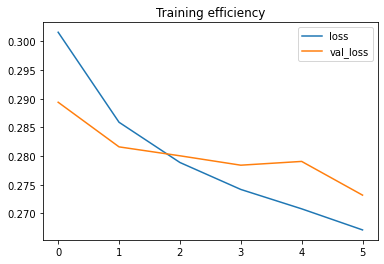

In [88]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Training efficiency')
plt.legend()

The lines do not converge in an ideal manner, there is room for improvement. Yet the accuracy is above 87, improving our logistic regression previously performed.

In [77]:
model.save('logistic_model_NN') #Saving the model

INFO:tensorflow:Assets written to: logistic_model_NN/assets


I have not had the time to actual run this model on test data 1 and 2. However, after some preprocessing of the test datasets to obtain a similar dataset as the main one, we can expect a similar accuracy as the one obtained for the validation data in this case.